In [1]:
import random
import matplotlib.pyplot as plt
# YOU ARE NOT ALLOWED TO IMPORT ANY OTHER LIBRARY PACKAGE
random.seed(821)

# Theory Part (40 Marks)

# Write your solution to Question 1 here.

<b>Ans:</b>
    
    λ^0 = [0,-1,1,0]
    λ^h = [[−1, 1, 0], [1, 0, −1], [0, 1, −1]]
    x = [-1,1]
    z^h_i = λ^h_i,0 + ∑(j= 1,2)λ^h_i,j * x_j for i = 1,2,3
    z^o = λ^o_0 +∑(i=1 to 3) λ^o_i· reLu(z^h_i)
    
    z1 = reLu(-1 + (1) * (-1) + (0) * (1)) = reLu(-2) = 0
    z2 = reLu(1 + (0) * (-1) + (-1) * (1)) = reLu(0) = 0
    z3 = reLu(0 + (1) * (-1) + (-1) * (1)) = reLu(-2) = 0
    
    z^o = 0+[(0)*(-1) + (0)*(-1)+(0)*(0)] = 0
    
    Since we have a binary classification with 2 possible output labels, 
    we ought to use Sigmoid Activation Function.
    
    Our predicted output label, yCap = argmax_y σ(0)
    or, yCap = argmax_y (0.5,0.25)
    so, yCap = prob(0.5) in which y is yes.
  <b> Hence, our predicted label is yes </b>





# Write your solution to Question 2 here.

<b> Ans: </b>
    
The original dimension/no of features of the samples/object = d
original data = [X1, X2, . . . , Xd]
Augmented the data with extra features log(Xn) and (Xn)^2 for n = 1,2,3,...,d
So, augmented data = [X1, X2, . . . , Xd, log(X1), log(X2), . . . , log(Xd),(X1)^2,(X2)^2, . . . ,(Xd)^2]
    
<b>Dimensionality of the parameter of the model</b> :
        
        f(Xaug, λaug) = λ0 + λaug,1Xaug,1 + λaug,2Xaug,2 + · · ·
    
<b>is 3d+1</b>, as the extended model translates to 
        
        fext(X) = λ0 +∑(i= 1 to d) (λ_1,i * X_i + λ2,i * log(X_i) + λ_3,i * (X_i)^2)
        
In comparison to the original model, <b> the augmented model is more flexible </b>, as this model can predict cases, where the
test or real i/p is having features which can not be fit properly with a straight line, but maybe with a curve.
      

# Write your solution to Question 3 here.

The following code calculates the necessary values.

In [2]:
data = [(1.2, 0), (2, 1), (0.1, 2), (2.1, 0), (-0.1, 1)]
x_val = [1.2,2,0.1,2.1,-0.1]
y_val = []
x_val.sort()
for x in x_val:
    for d in data:
        if x == d[0]:
            y_val.append(d[1])
thres_list = []
x = len(x_val)
for i in range(len(x_val)):
    if i!= x-1 :
        thres_list.append(round((x_val[i]+x_val[i+1])/2,2))
print('Threshold List : ', thres_list)

Threshold List :  [0.0, 0.65, 1.6, 2.05]


In [3]:
def binSplitter(thres,data):
    bin1 = []
    bin2 = []
    for d in data:
        if d <= thres:
            bin1.append(d)
        else:
            bin2.append(d)
    
    return bin1,bin2

In [4]:
GD = 0.64
for t in thres_list:
    B1,B2 = binSplitter(t,x_val)
    print('Threshold : ', t)
    print(B1)
    print(B2)
    p1_b1=0
    p2_b1 =0
    p3_b1 = 0
    
    p1_b2 =0
    p2_b2 =0
    p3_b2 =0
    for b in B1:
        label = y_val[x_val.index(b)]
        if label == 0:
            p1_b1 = p1_b1 + 1
        elif label == 1:
            p2_b1 = p2_b1 + 1
        else:
            p3_b1 = p3_b1 + 1
    
    for b in B2:
        label = y_val[x_val.index(b)]
        if label == 0:
            p1_b2 = p1_b2 + 1
        elif label == 1:
            p2_b2 = p2_b2 + 1
        else:
            p3_b2 = p3_b2 + 1
        
    p1 = (p1_b1/len(B1),p2_b1/len(B1),p3_b1/len(B1))
    p2 = (p1_b2/len(B2),p2_b2/len(B2),p3_b2/len(B2))
    
    print ('p1 : ', p1)
    print('p2 : ', p2)
    
    GB1 = 0
    GB2 = 0
    for p in p1:
        GB1 = GB1 + (p*(1-p))
    
    for p in p2:
        GB2 = GB2 + (p*(1-p))
        
    print('G(B1) : ', GB1)
    print('G(B2) : ', GB2,)
    
    I = GD - 1/len(x_val)*(len(B1)*GB1 + len(B2)*GB2)
    print('Information Gain : ', round(I,2),'\n')
    

Threshold :  0.0
[-0.1]
[0.1, 1.2, 2, 2.1]
p1 :  (0.0, 1.0, 0.0)
p2 :  (0.5, 0.25, 0.25)
G(B1) :  0.0
G(B2) :  0.625
Information Gain :  0.14 

Threshold :  0.65
[-0.1, 0.1]
[1.2, 2, 2.1]
p1 :  (0.0, 0.5, 0.5)
p2 :  (0.6666666666666666, 0.3333333333333333, 0.0)
G(B1) :  0.5
G(B2) :  0.4444444444444445
Information Gain :  0.17 

Threshold :  1.6
[-0.1, 0.1, 1.2]
[2, 2.1]
p1 :  (0.3333333333333333, 0.3333333333333333, 0.3333333333333333)
p2 :  (0.5, 0.5, 0.0)
G(B1) :  0.6666666666666667
G(B2) :  0.5
Information Gain :  0.04 

Threshold :  2.05
[-0.1, 0.1, 1.2, 2]
[2.1]
p1 :  (0.25, 0.5, 0.25)
p2 :  (1.0, 0.0, 0.0)
G(B1) :  0.625
G(B2) :  0.0
Information Gain :  0.14 



Impurity of the dataset = 0.64 [pD = (2/5,2/5,1/5)]
1. For case 1, the Gini Impurity of B1 = 0, and B2 = .625. So, information gain = 0.14
2. For case 2, the Gini Impurity of B1 = 0.5, and B2 = .44. So, information gain = 0.17
3. For case 3, the Gini Impurity of B1 = 0, and B2 = .625. So, information gain = 0.04
4. For case 4, the Gini Impurity of B1 = 0, and B2 = .625. So, information gain =  0.14

So, <b> the best binary split is {[(-0.1,1), (0.1,2)],[(1.2,0), (2,1), (2.1,0)]}. The threshold for split is 0.65 </b> 

The test sample 1.1 falls in the 2nd bin as 1.1 > 0.65. The possible labels are 0 and 1.

1. By Bayes' Classification Method,

y_pred = arg_max{Prob(Y = i|X = x)}
y_pred = 0

2. By KNN, for K = 1 or 3,

y_pred = 0 ( for K=1, nearest neighbour is 1.2 and for K=3, majority is 0, so 0 wins)

so <b> our predicted label for 1.1 is 0. </b>

The following code snippet generates a random number, which is used as $p$ in Question 4(a).

In [5]:
p = random.randrange(2000,6001)
print( "The value of p you should use is", p )

The value of p you should use is 4335


# Write your solution to Question 4(a) here.

For random forest, we consider sqrt(p) attributes at each node. If sqrt(p) is <b> not an integer, we round up </b> 

So in our case, the total attributes sampled at each node is given by the following code snippet

In [6]:
p_node = int(pow(p,0.5)) + 1

print( 'In each node of each decision tree, ', p_node,' attributes should be sampled.')

In each node of each decision tree,  66  attributes should be sampled.


# Write your solution to Question 4(b) here.

The formula for a particular datapoint is chosen as the sample in a BTS, where only n datapoints are used with replacement is :
                                        
                                        1 - (1-1/n)^n

when 2n datapoints are chosen with replacement, the formula becomes :
                                        
                                        1 - (1 - 1/n)^2n

when n = 500, the chance for a datapoint to be selected is : 0.8649 or 86.49%

# Write your solution to Question 4(c) here.

"Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor." - IBM Cloud Education
(https://www.ibm.com/cloud/learn/boosting#:~:text=Boosting%20is%20an%20ensemble%20learning,the%20weaknesses%20of%20its%20predecessor.)

KNN is not considered to be a weak learner, as it already kind of fucntions by taking a vote. Consecutive iterations on same data for KNN improves/changes the performance of the model by little to no margin. Hence, boosting is mostly ineffective when used with KNN.

"Ensemble methods rely on the instability of the classifiers to improve their performance, as k-NN is
fairly stable with respect to resampling, these methods fail in their attempt to improve the performance
of k-NN classifier." - Nicolás García-Pedrajas *, Domingo Ortiz-Boyer (http://www.stat.yale.edu/~lc436/papers/KNN/Garcia-Pedrajas_2009.pdf)

# The following code snippet is for Question 5(a). It generates 8 random datapoints in $\mathbb{R}^2$, and puts them into three clusters initially.

In [7]:
clusters = [1,2,2,2,2,3,3]
random.shuffle(clusters)
for i in range(7):
    print( (random.randrange(0,21), random.randrange(0,21)), "is in Cluster", clusters[i] )

(3, 12) is in Cluster 2
(20, 17) is in Cluster 3
(8, 8) is in Cluster 1
(11, 14) is in Cluster 2
(10, 9) is in Cluster 2
(6, 10) is in Cluster 2
(8, 3) is in Cluster 3


# Write your solution to Question 5(a) here.

The following code snippet runs K-Means on the data for 2 iterations


In [8]:
def centCal(cluster):
    x = 0
    y = 0

    for val in cluster:
        x = x + val[0]
        y = y + val[1]

    return x/len(cluster), y/len(cluster)

In [9]:
def distancexy(point1, point2):
    # write the content of this function
    # returns a number which is the Euclidean distance between the two points
    x_diff = point1[0]-point2[0]
    y_diff = point1[1]-point2[1]
    SumSqDiff = pow(x_diff,2) + pow(y_diff,2)
    return pow(SumSqDiff,0.5)

In [10]:
clusters = [1,2,2,2,2,3,3]
random.shuffle(clusters)
data = []
for i in range(7):
    d = []
    d.append(random.randrange(0,21))
    d.append(random.randrange(0,21))
    d.append(clusters[i])
    d = tuple(d)
    data.append(d)
    
print('Data in R2 and Clusters : ', data)

Data in R2 and Clusters :  [(3, 16, 2), (12, 15, 2), (0, 15, 2), (16, 5, 3), (15, 9, 3), (18, 14, 2), (17, 18, 1)]


In [11]:
clust1 = []
clust2 = []
clust3 = []
for d in data:
        if d[2] == 1:
            clust1.append((d[0],d[1]))
        elif d[2] == 2:
            clust2.append((d[0],d[1]))
        else:
            clust3.append((d[0],d[1]))

clustList = [clust1,clust2,clust3]


for m in range (2):
    print('============================================================================================')
    print('                                   ITERATION : ', m+1)
    print('============================================================================================\n')





    centroidList = []

    for i in range(len(clustList)):
        centx,centy = centCal(clustList[i])
        centroidList.append((centx,centy))
        print ('Initial Centroid for Cluster',i+1,' is ', (centx,centy))
    
    minClust1 = []
    for val in clust1:
        dist =  9999999999
        k = 0
        for c in centroidList:
            d = distancexy(c,val)
            if d < dist :
                dist = d
                k = centroidList.index(c)
        minClust1.append(k+1)

    minClust2 = []
    for val in clust2:
        dist =  9999999999
        k = 0
        for c in centroidList:
            d = distancexy(c,val)
            if d < dist :
                dist = d
                k = centroidList.index(c)
        minClust2.append(k+1)
    
    minClust3 = []
    for val in clust3:
        dist =  9999999999
        k = 0
        for c in centroidList:
            d = distancexy(c,val)
            if d < dist :
                dist = d
                k = centroidList.index(c)
        minClust3.append(k+1)

    for i in range(len(clust1)):
        if minClust1[i]!=1:
            if minClust1[i] == 2:
                clust2.append(clust1[i])
                clust1.remove(clust1[i])
            if  minClust1[i] == 3:
                clust3.append(clust1[i])
                clust1.remove(clust1[i])

    for i in range(len(clust2)):
        if minClust2[i]!=2:
            if minClust2[i] == 1:
                clust1.append(clust2[i])
                clust2.remove(clust2[i])
            if minClust2[i] == 3:
                clust3.append(clust2[i])
                clust2.remove(clust2[i])

    for i in range(len(clust3)):
        if minClust3[i]!=3:
            if minClust3[i] == 1:
                clust1.append(clust3[i])
                clust3.remove(clust3[i])
            if minClust3[i] == 2:
                clust2.append(clust3[i])
                clust3.remove(clust3[i])

    print ('After ',m+1,' iteration, Cluster 1 is : ', clust1)            
    print ('After ',m+1,' iteration, Cluster 2 is : ', clust2)
    print ('After ',m+1,' iteration, Cluster 3 is : ', clust3)
               

                                   ITERATION :  1

Initial Centroid for Cluster 1  is  (17.0, 18.0)
Initial Centroid for Cluster 2  is  (8.25, 15.0)
Initial Centroid for Cluster 3  is  (15.5, 7.0)
After  1  iteration, Cluster 1 is :  [(17, 18), (18, 14)]
After  1  iteration, Cluster 2 is :  [(3, 16), (12, 15), (0, 15)]
After  1  iteration, Cluster 3 is :  [(16, 5), (15, 9)]
                                   ITERATION :  2

Initial Centroid for Cluster 1  is  (17.5, 16.0)
Initial Centroid for Cluster 2  is  (5.0, 15.333333333333334)
Initial Centroid for Cluster 3  is  (15.5, 7.0)
After  2  iteration, Cluster 1 is :  [(17, 18), (18, 14), (12, 15)]
After  2  iteration, Cluster 2 is :  [(3, 16), (0, 15)]
After  2  iteration, Cluster 3 is :  [(16, 5), (15, 9)]


# Write your solution to Question 5(b) here.

Single Linkage clusters are formed when 2 separate clusters closest points are close enough to form a cluster. So a single cluster tends to spread all over the database like a contagion. Even observations which are far apart from each other in space can end up becoming a part of the same clusters in a few iterations.

By 'bias' , it means that instead of accounting for centroid or other measure of the clusters, single linkage simply takes into account the 2 closest points of 2 clusters. Which means that instead of respecting all the features in the model, the model is much more simplified and not robust or generalized at all. Any incoming test point has a high chance of being placed in the large cluster.

So often single linkage method will <b> create a single large cluster, which creates a decision boundary that is very detailed and tries to account for majority of the datapoints, instead of generalizing properly.</b> Hence, the Single Linkage in AHC causes bias.


# Practical Part (60 Marks)

# Write your code for Task 1 here

In [12]:
datapoints = []
for val in range (100):
    x1 = random.uniform(-50, 50)
    y1 = random.uniform(-50, 50)
    z1 = random.uniform(-50, 50)
    datapoints.append((int(x1),int(y1),int(z1)))
    
datapoints6 = []
for val in range (6):
    x1 = random.uniform(-50, 50)
    y1 = random.uniform(-50, 50)
    z1 = random.uniform(-50, 50)
    datapoints6.append((int(x1),int(y1),int(z1)))

# Write your code for Task 2 here

In [13]:
def distance(point1, point2):
    # write the content of this function
    # returns a number which is the Euclidean distance between the two points
    x_diff = point1[0]-point2[0]
    y_diff = point1[1]-point2[1]
    z_diff = point1[2]-point2[2]
    SumSqDiff = pow(x_diff,2) + pow(y_diff,2) + pow(z_diff,2)
    return pow(SumSqDiff,0.5)

# Write your code for Task 3 here;

In [14]:
class singleNode:
    def __init__(self, x):
        # write the content of the constructor here; this constructor is used to initalize the single-point clusters in AHC
        self.cluster = [x]
        self.height = 0
        self.leftChild = None
        self.rightChild = None
    
    def getCluster(self):
        return self.cluster
    
    def getHeight(self):
        return self.height
    
    def __str__(self):
        return 'Clusters : ' + str(self.cluster) + ' Height : ' + str(self.height) 

class Node(singleNode):
    def __init__(self, x):
        # write the content of the constructor here; this constructor is used to initalize the single-point clusters in AHC
        self.cluster = x
    
    def setCluster(self,cluster1,cluster2):
        self.cluster = []
        self.cluster.append(cluster1)
        self.cluster.append(cluster2)
    
    def getCluster(self):
        return self.cluster
    
    def setHeight(self,h):
        self.height = h
    
    def getHeight(self):
        return self.height
    
    def setleftChild(self,lC):
        self.leftChild = lC
    
    def getleftChild(self):
        return self.leftChild
    
    def setrightChild(self, rC):
        self.rightChild = rC
        
    def getrightChild(self):
        return self.rightChild
    
    def __str__(self):
        return 'Clusters : ' + str(self.cluster) + ' Height : ' + str(self.height) 

currentClusters = []
for i in range(100):
    tempNode = Node(datapoints[i])
    currentClusters.append(tempNode)

# Write your code for Task 4 here

In [15]:
def singleLinkage(node1, node2):
    # write the content of this function
    # returns a number which is the single linkage between the two clusters in the two nodes
    Linkage = []
    node_1 = node1.getCluster()
    node_2 = node2.getCluster()
    for i in node_1:
        for j in node_2:
            Linkage.append(distance(i,j))
    
    return min(Linkage)

def completeLinkage(node1, node2):
    # complete linkage
    Linkage = []
    node_1 = node1.getCluster()
    node_2 = node2.getCluster()
    for i in node_1:
        for j in node_2:
            Linkage.append(distance(i,j))
    
    return max(Linkage)

def averageLinkage(node1, node2):
    # average linkage
    Linkage = []
    node_1 = node1.getCluster()
    node_2 = node2.getCluster()
    for i in node_1:
        for j in node_2:
            Linkage.append(distance(i,j))
    
    return (sum(Linkage)/len(Linkage))


def centroidLinkage(node1, node2):
    # centroid linkage
    x_sum_node1 = 0
    y_sum_node1 = 0
    z_sum_node1 = 0
    node_1 = node1.getCluster()
    for val in range(len(node_1)):
        x_sum_node1 = x_sum_node1 + node_1[val][0]
        y_sum_node1 = y_sum_node1 + node_1[val][1]
        z_sum_node1 = z_sum_node1 + node_1[val][2]
    
    node1_centroid = (x_sum_node1/len(node_1),y_sum_node1/len(node_1),z_sum_node1/len(node_1))
    
    x_sum_node2 = 0
    y_sum_node2 = 0
    z_sum_node2 = 0
    node_2 = node2.getCluster()
    for val in range(len(node_2)):
        x_sum_node2 = x_sum_node2 + node_2[val][0]
        y_sum_node2 = y_sum_node2 + node_2[val][1]
        z_sum_node2 = z_sum_node2 + node_2[val][2]
    
    node2_centroid = (x_sum_node2/len(node_2),y_sum_node2/len(node_2),z_sum_node2/len(node_2))
    
    return distance(node1_centroid,node2_centroid)

# Write your code for Task 5 here

In [16]:
def clustersToMerge(currentClusters, linkage): # when this function is used, linkage should be one of the four linkage functions you implemented for Task 4
    # write the content of this function
    # returns a tuple (i,j,h) which indicates that the i-th and j-th nodes should be merged next \
    # \to form a new Node with height h
    Linkvals = []
    nodePairs = []
    for i in range(len(currentClusters)):
        for j in range (i+1, len(currentClusters)):
            Linkvals.append(linkage(currentClusters[i],currentClusters[j]))
            nodePairs.append((currentClusters[i],currentClusters[j]))
    height = min(Linkvals)
    nodeTup = nodePairs[Linkvals.index(height)]
    return nodeTup[0],nodeTup[1],height

# Write your code for Task 6 here

In [17]:
def ahc(datapoints, linkage):
    # write the content of this function
    # returns the root node of the AHC tree
    currentClusters = []
    for i in range(len(datapoints)):
        tempNode = singleNode(datapoints[i])
        currentClusters.append(tempNode)
    
    while (len(currentClusters) > 1):
        i, j, h = clustersToMerge(currentClusters,linkage)
        currentClusters.remove(i)
        currentClusters.remove(j)
        
        combined = i.getCluster() + j.getCluster()
        clust = Node(combined)
        clust.setHeight(h)
        clust.setleftChild(i)
        clust.setrightChild(j)
        currentClusters.append(clust)
        
        
    return currentClusters[0]


# Write your code for Task 7 here

In [18]:
def cutTree(rootNode, k):
     # write the content of this function
     # returns the k clusters obtained by cutting the AHC tree at an appropriate height
    if k == 1:
        return rootNode
    else:
        currCluster = [rootNode]
        while (len(currCluster) < k):
            heightList = []
            
            for i in range(len(currCluster)):
                heightList.append(currCluster[i].getHeight())
            
            splitThis = currCluster[heightList.index(max(heightList))]
            currCluster.append(splitThis.getleftChild())
            currCluster.append(splitThis.getrightChild())
            currCluster.remove(splitThis)
            
        return currCluster

# Write your code for generating the plots here

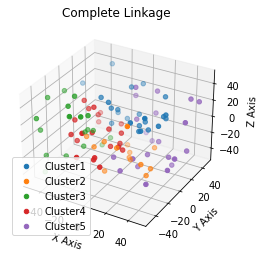

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = 1

cut5 = cutTree(ahc(datapoints, completeLinkage), 5)
for val in cut5:
    lbl = []
    k = 'Cluster' + str(c)
    c = c + 1
    lbl.append (k)
    l = val.getCluster()
    xs = []
    ys = []
    zs = []
    
    for i in l:

        xs.append(i[0])
        ys.append(i[1])
        zs.append(i[2])
    ax.scatter(xs,ys,zs,label = k)
    ax._get_lines.get_next_color()

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Complete Linkage')
plt.legend()
plt.show()

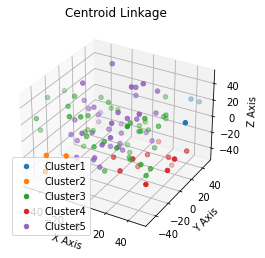

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = 1

cut5 = cutTree(ahc(datapoints, centroidLinkage), 5)
for val in cut5:
    lbl = []
    k = 'Cluster' + str(c)
    c = c + 1
    lbl.append (k)
    l = val.getCluster()
    xs = []
    ys = []
    zs = []
    
    for i in l:

        xs.append(i[0])
        ys.append(i[1])
        zs.append(i[2])
    ax.scatter(xs,ys,zs,label = k)
    ax._get_lines.get_next_color()

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Centroid Linkage')
plt.legend()
plt.show()

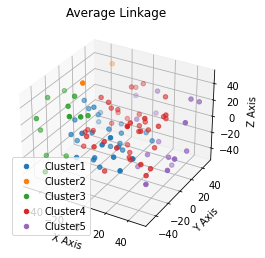

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = 1

cut5 = cutTree(ahc(datapoints, averageLinkage), 5)
for val in cut5:
    lbl = []
    k = 'Cluster' + str(c)
    c = c + 1
    lbl.append (k)
    l = val.getCluster()
    xs = []
    ys = []
    zs = []
    
    for i in l:

        xs.append(i[0])
        ys.append(i[1])
        zs.append(i[2])
    ax.scatter(xs,ys,zs,label = k)
    ax._get_lines.get_next_color()

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Average Linkage')
plt.legend()
plt.show()

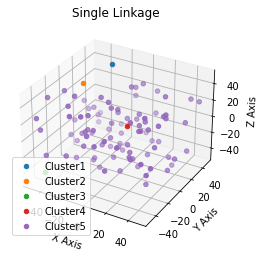

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = 1

cut5 = cutTree(ahc(datapoints, singleLinkage), 5)
for val in cut5:
    lbl = []
    k = 'Cluster' + str(c)
    c = c + 1
    lbl.append (k)
    l = val.getCluster()
    xs = []
    ys = []
    zs = []
    
    for i in l:

        xs.append(i[0])
        ys.append(i[1])
        zs.append(i[2])
    ax.scatter(xs,ys,zs,label = k)
    ax._get_lines.get_next_color()

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Single Linkage')
plt.legend()
plt.show()

# Write your observations from Task 7 here.

From the plots it is obvious that apart from Single Linkage, all the other linkages provide proper representation for all the 5 clusters formed. 
1. Average Linkage seems to place more points in Cluster 4.
2. Complete Linkage seems to have the most equal representation of all the cluster out of all 4 Linkages.
3. Centroid seems to create larger clusters 3 and 5, w.r.t the other clusters.
4. In case of Single Linkage, Cluster 5 seems to completely overwhelm the entire AHC. This creates a biased model, i.e a model that is biased towards a particular cluster.